In [55]:
from IPython.display import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

In [303]:
class_dict_instrument = {
    '0':'grasper',
    '1':'bipolar',
    '2':'hook',
    '3':'scissors',
    '4':'clipper',
    '5':'irrigator',
    '-1':'null_instrument',
}

class_dict_verb = {
    '0':'grasp',
    '1':'retract',
    '2':'dissect',
    '3':'coagulate',
    '4':'clip',
    '5':'cut',
    '6':'aspirate',
    '7':'irrigate',
    '8':'pack',
    '9':'null_verb',
}

class_dict_tissue = {
    '0':'gallbladder',
    '1':'cys_plate',
    '2':'cys_duct',
    '3':'cys_artery',
    '4':'cys_pedicle',
    '5':'blood_vessel',
    '6':'fluid',
    '7':'abd_wall_cav',
    '8':'liver',
    '9':'adhesion',
    '10':'omentum',
    '11':'peritoneum',
    '12':'gut',
    '13':'specimen_bag',
    '14':'null_target',
}

### IVT Metrics

In [117]:
sns.set_theme()

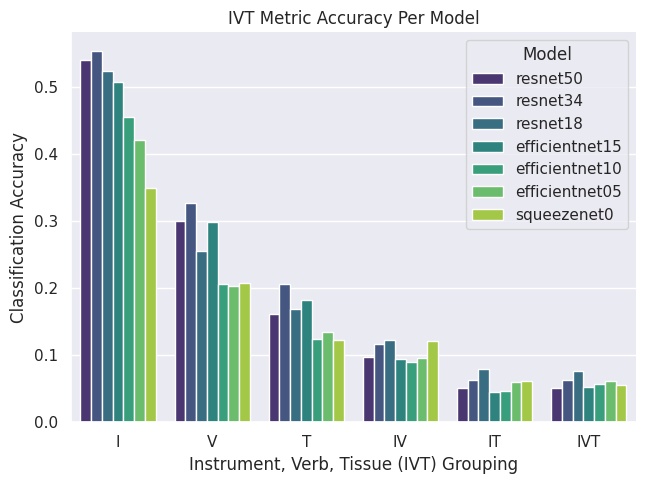

In [290]:
model_dict = {
    'resnet50': [0.5402, 0.3007, 0.1620, 0.0975, 0.0515, 0.0512],
    'resnet34': [0.5542, 0.3277, 0.2068, 0.1174, 0.0633, 0.0630],
    'resnet18': [0.5248, 0.2552, 0.1684, 0.1229, 0.0797, 0.0765],
    'efficientnet15': [0.5079, 0.2983, 0.1828, 0.0945, 0.0452, 0.0531],    
    'efficientnet10': [0.4555, 0.2057, 0.1243, 0.0899, 0.0468, 0.0574],
    'efficientnet05': [0.4206, 0.2040, 0.1346, 0.0962, 0.0595, 0.0614],
    'squeezenet0': [0.3499, 0.2075, 0.1227, 0.1218, 0.0618, 0.0555],
}


model = []
ivt_metric = []
accuracy = []
ivt_name = ['I','V','T','IV','IT','IVT']

for (model_name, acc_list) in model_dict.items():
    
    for i, acc in enumerate(acc_list):
        
        model.extend([model_name])
        ivt_metric.extend([ivt_name[i]])
        accuracy.extend([acc])
        
mean_dict = {
    'Model':model,
    'Instrument, Verb, Tissue (IVT) Grouping':ivt_metric,
    'Classification Accuracy':accuracy,
}

mean_df = pd.DataFrame(mean_dict)


g = sns.catplot(
    data=mean_df, kind="bar", x='Instrument, Verb, Tissue (IVT) Grouping', y="Classification Accuracy", hue="Model", palette='viridis'
)
g._legend.remove()
plt.legend(ncol=1, title='Model')
plt.title('IVT Metric Accuracy Per Model');
plt.tight_layout()
plt.savefig(f'/home/jupyter/pdls-final-project/img_src/ivt_metric_accuracy_per_model_bar_plot.png', dpi=500)

In [217]:
csv_file = '/home/jupyter/pdls-final-project/results/model_comparison_all_test_1_2_6_8.csv'

ivt_df = pd.read_csv(csv_file)

ivt_df['Parameters (Millions)'] = [11.7, 21.8, 25.6, 1.2, 1.4, 2.3, 3.5]
ivt_df['Model Type'] = ['ResNet','ResNet','ResNet','SqueezeNet','ShuffleNet','ShuffleNet','ShuffleNet']

ivt_df.columns[90:120]

Index(['IT32', 'IT33', 'IT34', 'IT35', 'IT36', 'IT37', 'IT38', 'IT39', 'IT40',
       'IT41', 'IT42', 'IT43', 'IT44', 'IT45', 'IT46', 'IT47', 'IT48', 'IT49',
       'IT50', 'IT51', 'IT52', 'IT53', 'IT54', 'IT55', 'IT56', 'IT57', 'IT58',
       'IVT0', 'IVT1', 'IVT2'],
      dtype='object')

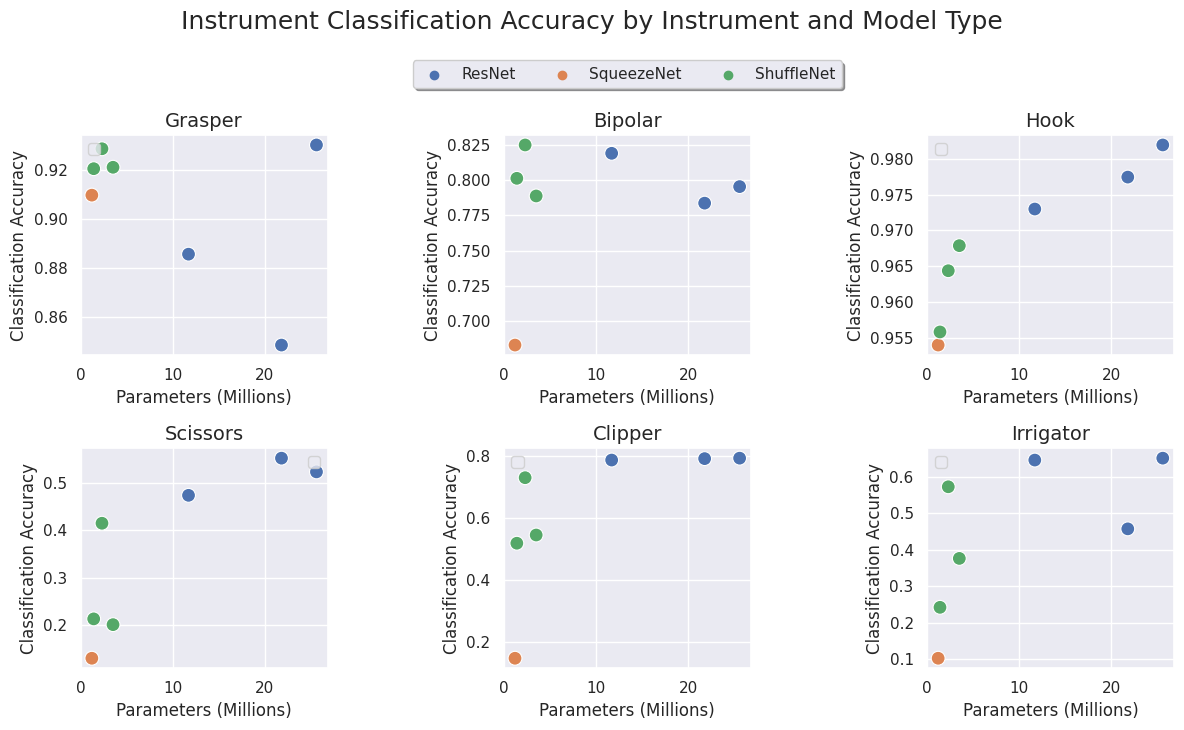

In [152]:
fig, axes = plt.subplots(figsize=(12,7), nrows=2, ncols=3)

axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.scatterplot(data=ivt_df, x='Parameters (Millions)', y=f'I{i}', hue='Model Type', ax=ax, s=100)
    ax.set_title(f'{class_dict_instrument[str(i)].capitalize()}', fontsize=14)
    ax.set_ylabel('Classification Accuracy')
    ax.grid(True)
    if i==1:
        ax.legend(loc='lower center', bbox_to_anchor=(0, 1.18, 1, 0.1), fancybox=True, shadow=True, ncol=5)
    else:
        ax.legend([])
    
plt.tight_layout()
fig.suptitle('Instrument Classification Accuracy by Instrument and Model Type', y=1.04, fontsize=18);
fig.savefig(f'/home/jupyter/pdls-final-project/img_src/classification_accuracy_models_instrument.png', dpi=500)

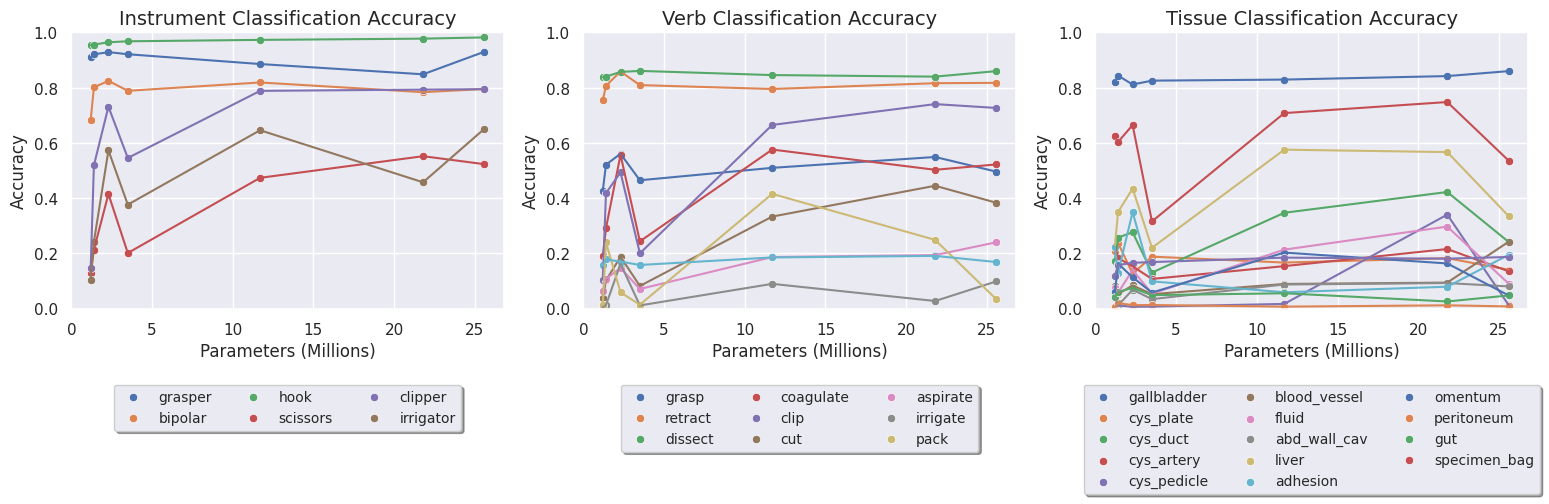

In [307]:
fig, axes = plt.subplots(figsize=(16,5), ncols=3)    
    
lengths = [6, 10, 15]
ivt_names = ['I','V','T']
class_dicts = [class_dict_instrument, class_dict_verb, class_dict_tissue]
titles = ['Instrument', 'Verb', 'Tissue']
xlims=[45,45,45]

for ax, length, ivt_name, class_dict, xlim, title in zip(axes, lengths, ivt_names, class_dicts, xlims, titles):
    
    if ivt_name == 'V':
        y_name = f'{ivt_name} '
    else:
        y_name = f'{ivt_name}'
    
    for i in range(length):
        sns.scatterplot(data=ivt_df, x='Parameters (Millions)', y=f'{y_name}{i}', ax=ax)
        #sns.lineplot(data=ivt_df, x='Parameters (Millions)', y=f'{y_name}{i}', ax=ax)
    
    legend_str = [value for (key, value) in class_dict.items()]
    #ax.legend(legend_str[:-1], ncol=2, loc=8, prop={'size': 10}, bbox_to_anchor=(0.5,0))
    ax.set_title(f'{title} Classification Accuracy', fontsize=14)
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0,1.0)
    ax.grid(True)
    
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(legend_str[:-1], ncol=3, prop={'size': 10}, loc='upper center', bbox_to_anchor=(0.5, -0.25),fancybox=True, shadow=True)
    
    for i in range(length):
        #sns.scatterplot(data=ivt_df, x='Parameters (Millions)', y=f'{y_name}{i}', ax=ax)
        sns.lineplot(data=ivt_df, x='Parameters (Millions)', y=f'{y_name}{i}', ax=ax)
    
#axes[2].legend(['ResNet-18','ResNet-34','ResNet-50','SqueezeNet','ShuffleNet-0.5','ShuffleNet-1.0','ShuffleNet-1.5'],ncol=2)

plt.tight_layout()
fig.savefig(f'/home/jupyter/pdls-final-project/img_src/classification_accuracy_models_vs_parameters.png', dpi=500)

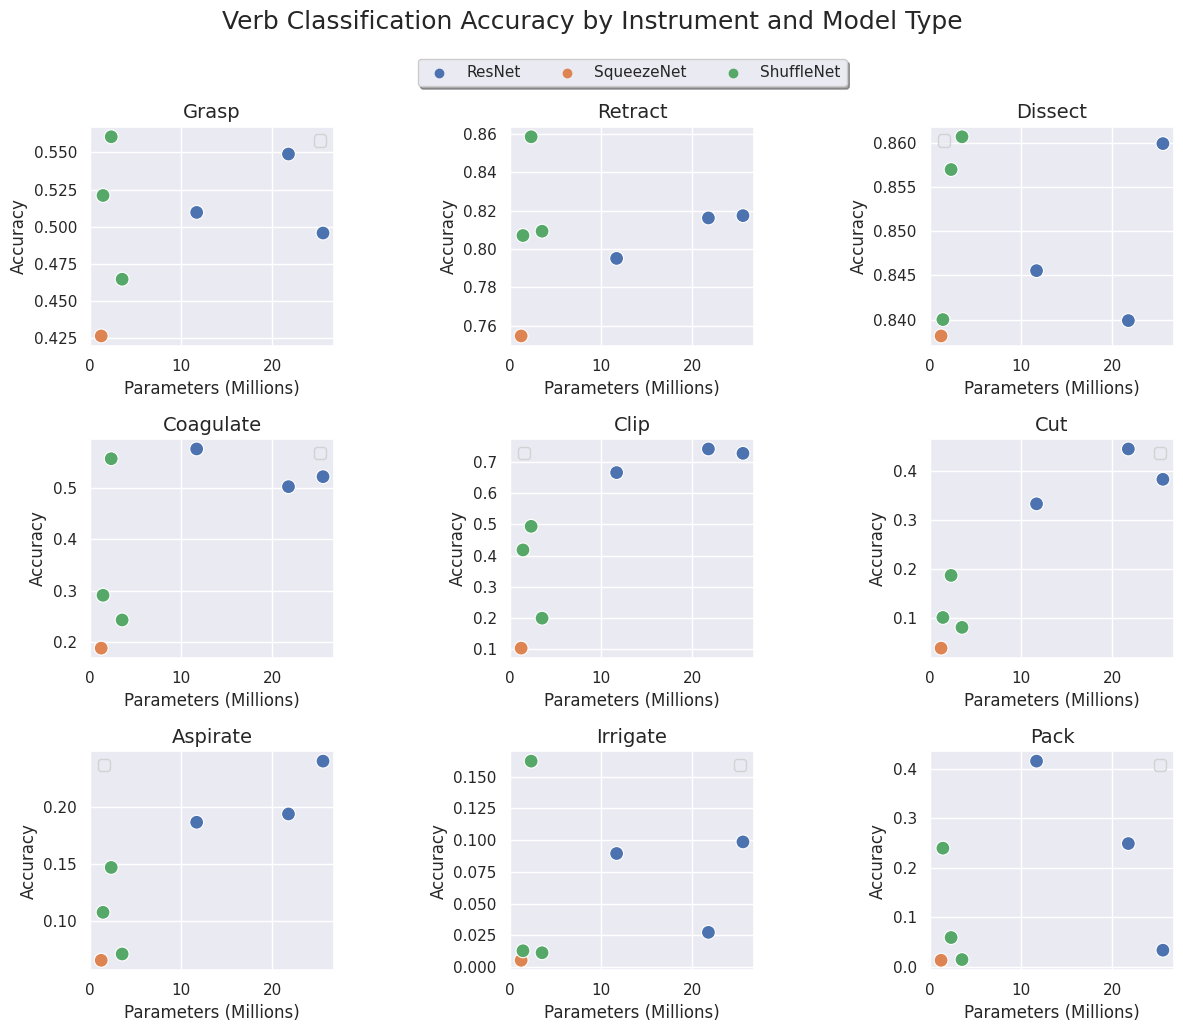

In [149]:
fig, axes = plt.subplots(figsize=(12,10), nrows=3, ncols=3)

axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.scatterplot(data=ivt_df, x='Parameters (Millions)', y=f'V {i}', hue='Model Type', ax=ax, s=100)
    ax.set_title(f'{class_dict_verb[str(i)].capitalize()}', fontsize=14)
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    if i==1:
        ax.legend(loc='lower center', bbox_to_anchor=(0, 1.15, 1, 0.1), fancybox=True, shadow=True, ncol=5)
    else:
        ax.legend([])

plt.tight_layout()
fig.suptitle('Verb Classification Accuracy by Instrument and Model Type', y=1.03, fontsize=18);
fig.savefig(f'/home/jupyter/pdls-final-project/img_src/classification_accuracy_models_verb.png', dpi=500)

### Downsampling

In [2]:
video_dir = '/home/jupyter/CholecT45/data/'

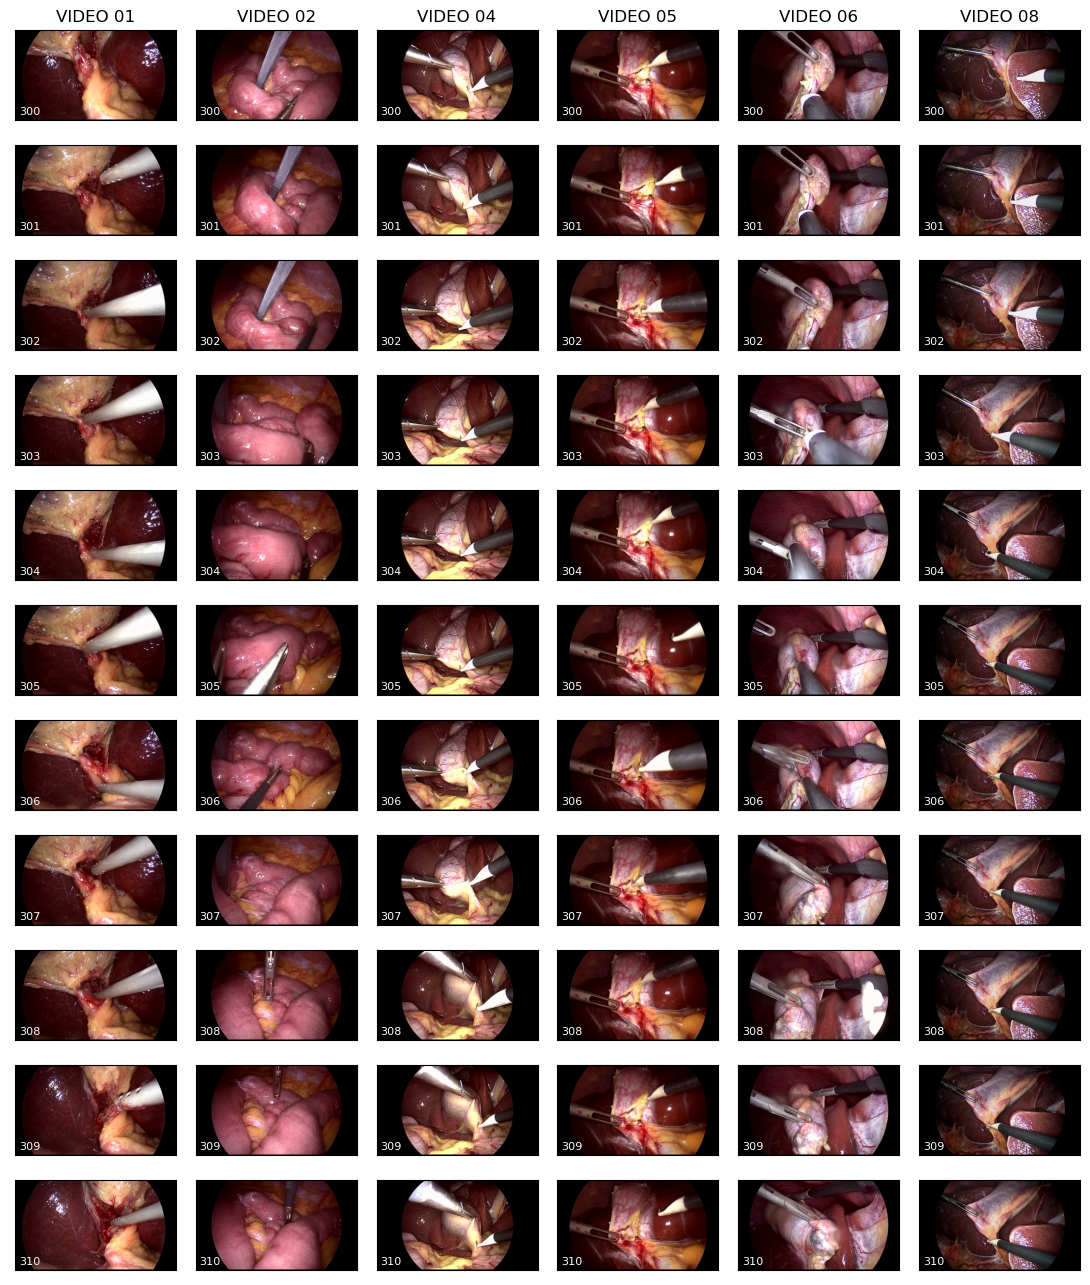

In [4]:
VID_IDS = ['01', '02', '04', '05','06','08']
NUM_IMAGES = 11

fig, axes = plt.subplots(figsize=(11,13), ncols=len(VID_IDS), nrows=NUM_IMAGES, sharex=True, sharey=True)
axes = axes.T.flatten()

imgs = []
frame = []
for v in VID_IDS:
    imgs.extend([mpimg.imread(os.path.join(video_dir, f'VID{v}/' + f'{i+300:06d}.png')) for i in range(NUM_IMAGES)])
    frame.extend([i+300 for i in range(NUM_IMAGES)])

for i, (img, ax) in enumerate(zip(imgs, axes)):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(20,450, f'{frame[i]:d}', fontsize=8, color='white')
    if (i % NUM_IMAGES == 0):
        ax.set_title(f'VIDEO {VID_IDS[int((i+1)/NUM_IMAGES)]}') 
    
plt.tight_layout()

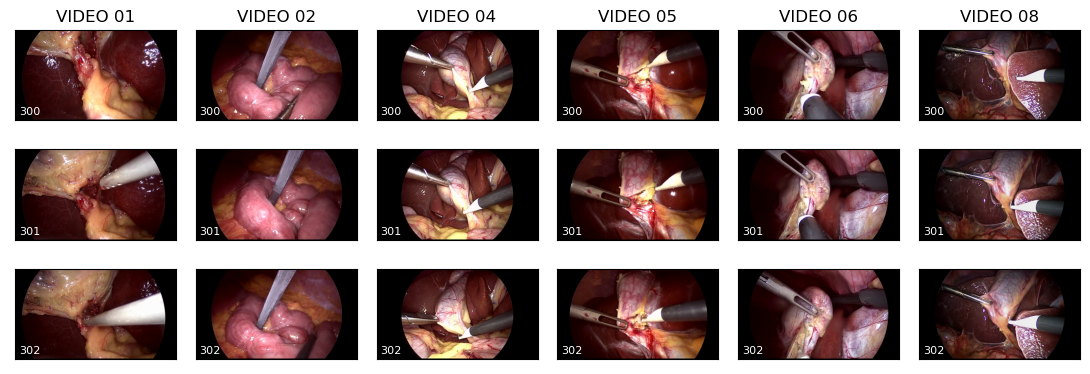

In [6]:
NUM_IMAGES = 3
fig, axes = plt.subplots(figsize=(11,4), ncols=len(VID_IDS), nrows=NUM_IMAGES, sharex=True, sharey=True)
axes = axes.T.flatten()

imgs = []
frame = []
for v in VID_IDS:
    imgs.extend([mpimg.imread(os.path.join(video_dir, f'VID{v}/' + f'{i+300:06d}.png')) for i in range(NUM_IMAGES)])
    frame.extend([i+300 for i in range(NUM_IMAGES)])
    
for i, (img, ax) in enumerate(zip(imgs, axes)):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    if (i % NUM_IMAGES == 0):
        ax.set_title(f'VIDEO {VID_IDS[int((i+1)/NUM_IMAGES)]}') 
    ax.text(20,450, f'{frame[i]:d}', fontsize=8, color='white')
    
plt.tight_layout()
fig.savefig('/home/jupyter/pdls-final-project/img_src/video_frames_example.png', dpi=500)

### CAM

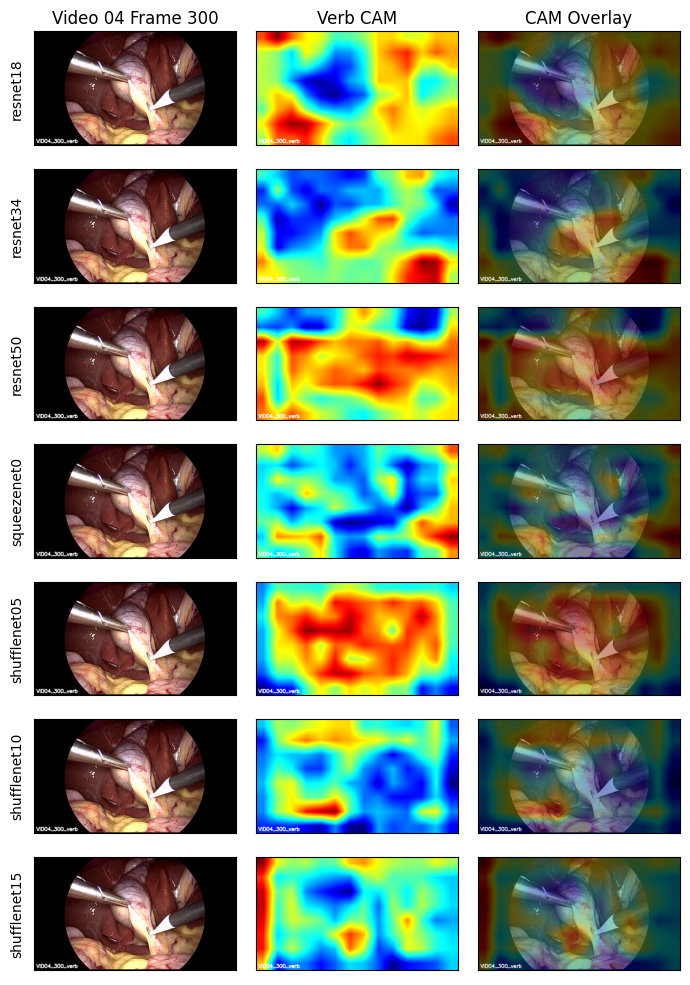

In [53]:
cam_dir = '/home/jupyter/CAM/'

models = ['resnet18', 'resnet34', 'resnet50', 'squeezenet0', 'shufflenet05', 'shufflenet10', 'shufflenet15']

vid_dir = 'VID04'

frame_num = '000300'

fig, axes = plt.subplots(figsize=(7,10), ncols=3, nrows=len(models), sharex=True, sharey=True)
axes = axes.T.flatten()

imgs = []
frame = []
class_str = 'verb'

for img_type in ['input','cam','overlay']:
    for model in models:
        
        img = mpimg.imread(os.path.join(cam_dir, model, vid_dir, f'{frame_num}_{class_str}_{img_type}.png'))
        imgs.extend([img])
                     
    # frame.extend([i+300 for i in range(NUM_IMAGES)])

for i, (img, ax) in enumerate(zip(imgs, axes)):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    if i < 7:
        ax.set_ylabel(models[i])
    if i == 0:
        ax.set_title('Video 04 Frame 300')
    if i == 7:
        ax.set_title(f'{class_str.capitalize()} CAM')
    if i ==14:
        ax.set_title('CAM Overlay')
    # ax.text(20,450, f'{frame[i]:d}', fontsize=8, color='white')
    # if (i % NUM_IMAGES == 0):
    #     ax.set_title(f'VIDEO {VID_IDS[int((i+1)/NUM_IMAGES)]}') 
    
plt.tight_layout()
fig.savefig(f'/home/jupyter/pdls-final-project/img_src/model_cam_comparison_vid04_frame300_{class_str}.png', dpi=500)

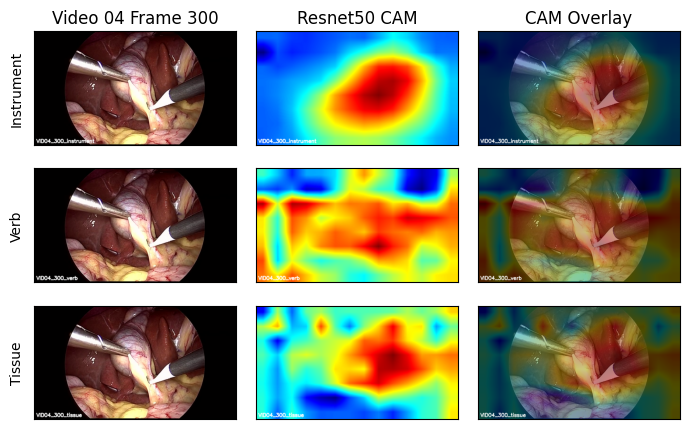

In [49]:
cam_dir = '/home/jupyter/CAM/'
model = 'resnet50'
vid_dir = 'VID04'
frame_num = '000300'

fig, axes = plt.subplots(figsize=(7,4.5), ncols=3, nrows=3, sharex=True, sharey=True)
axes = axes.T.flatten()

imgs = []
frame = []

class_strs = ['instrument','verb','tissue']

for img_type in ['input','cam','overlay']:
    for class_str in class_strs:
        
        img = mpimg.imread(os.path.join(cam_dir, model, vid_dir, f'{frame_num}_{class_str}_{img_type}.png'))
        imgs.extend([img])
                     
    # frame.extend([i+300 for i in range(NUM_IMAGES)])

for i, (img, ax) in enumerate(zip(imgs, axes)):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    if i < 3:
        ax.set_ylabel(class_strs[i].capitalize())
    if i == 0:
        ax.set_title('Video 04 Frame 300')
    if i == 3:
        ax.set_title(f'{model.capitalize()} CAM')
    if i == 6:
        ax.set_title('CAM Overlay')
    # ax.text(20,450, f'{frame[i]:d}', fontsize=8, color='white')
    # if (i % NUM_IMAGES == 0):
    #     ax.set_title(f'VIDEO {VID_IDS[int((i+1)/NUM_IMAGES)]}') 
    
plt.tight_layout()
fig.savefig(f'/home/jupyter/pdls-final-project/img_src/class_cam_comparison_vid04_frame300_{model}.png', dpi=500)